In [ ]:
!pip install -q langchain langchain_community faiss-cpu pymupdf openai


In [ ]:
import os
from langchain_community.chat_models import ChatOpenAI

# Masukkan API Key Groq kamu di sini
os.environ["OPENAI_API_KEY"] = "*********"  # GANTI dengan key milikmu
os.environ["OPENAI_API_BASE"] = "https://api.groq.com/openai/v1"

# Inisialisasi model LLaMA 3 dari Groq
llm = ChatOpenAI(
    model="llama3-70b-8192",
    temperature=0.2
)


In [ ]:
from google.colab import files
import fitz  # PyMuPDF

# Upload file PDF
uploaded = files.upload()

# Ambil nama file
nama_pdf = next(iter(uploaded))

# Ekstrak isi PDF
def ekstrak_teks_pdf(nama_file):
    doc = fitz.open(nama_file)
    teks = ""
    for halaman in doc:
        teks += halaman.get_text()
    doc.close()
    return teks

isi_pdf = ekstrak_teks_pdf(nama_pdf)
print(isi_pdf[:1000])  # tampilkan 1000 karakter pertama isi PDF


Saving DATASET DEEPLEARNING UNAMIN.pdf to DATASET DEEPLEARNING UNAMIN (1).pdf
AKADEMIK UNIVERSITAS MUHAMMADIYAH SORONG (UNAMIN) 
 
 
Sejak didirikan pada tahun 1982 sebagai Akademi hingga berubah menjadi Universitas 
pada tahun 2002, Universitas Muhammadiyah Sorong (Unamin) di Kota Sorong telah menjadi 
universitas yang menjadi pelopor dalam meningkatkan sumber daya manusia di Papua, sesuai 
dengan cita-cita pendirinya. Meskipun masih menjadi universitas yang utama dalam 
pengembangan sumber daya manusia di Papua, Unamin telah bergeser dan menjadi universitas 
nasional di Papua yang telah memberikan kontribusinya dalam skala nasional. Dengan lebih 
dari 11.000 lulusan yang menyebar hampir di seluruh tanah Papua, Unamin telah memberikan 
kontribusi besar bagi pembangunan di Papua dan juga di seluruh Indonesia, bahkan hingga ke 
luar negeri seperti Inggris, Amerika, Italia, serta beberapa negara di Asia Tenggara dan Asia 
Timur. Mahasiswa dan lulusan Unamin telah terlibat dalam berbagai 

In [ ]:
from transformers import AutoTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Inisialisasi tokenizer dari model yang kompatibel (misal MiniLM)
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

# Tokenisasi dan konversi ke token ID
tokens = tokenizer.encode_plus(
    isi_pdf,
    add_special_tokens=True,
    truncation=True,
    max_length=512,        # batas maksimal panjang input
    padding='max_length',  # lakukan padding jika kurang dari 512 token
    return_tensors='pt'    # atau 'np' jika ingin NumPy array
)

# Lihat token ID yang dihasilkan
print("Token IDs:", tokens["input_ids"])
print("Attention Mask:", tokens["attention_mask"])


Token IDs: tensor([[  101,  9875,  3207,  4328,  2243,  4895, 16402, 28032,  3022,  7187,
          8717,  2232,  2061, 17583,  1006, 14477, 10020,  1007,  7367, 18317,
          2106, 15735,  9126, 11687,  2050, 11937, 17157,  3196,  7367, 16078,
          4886,  9875,  3207,  4328,  7632,  3070,  3654,  2022,  6820, 24206,
          2273, 27875,  2072,  4895, 16402, 28032,  3022, 11687,  2050, 11937,
         17157,  2526,  1010,  4895, 16402, 28032,  3022,  7187,  8717,  2232,
          2061, 17583,  1006, 14477, 10020,  1007,  4487, 23856,  2061, 17583,
         10093,  4430,  2273, 27875,  2072,  4895, 16402, 28032,  3022,  8675,
          2273, 27875,  2072, 21877,  4135, 17822, 17488,  3286,  2273,  2075,
         24498,  9126,  7680,  5677,  2154,  2050,  2158, 24118,  4487, 13049,
          1010,  7367,  6342,  4886, 26957,  2319, 25022,  2696,  1011, 25022,
          2696,  7279,  4305,  6657,  3148,  1012,  2033,  5488, 14289,  2078,
         16137, 19190,  2273, 27875,  207

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings

# Bagi isi PDF menjadi potongan teks kecil-kecil
splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50
)
dokumen_terpotong = splitter.create_documents([isi_pdf])

# Gunakan model embedding lokal dari HuggingFace
embedder = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
embedding_vector = embedder.embed_documents([d.page_content for d in dokumen_terpotong])

# Tampilkan jumlah dokumen
print(f"Total potongan dokumen: {len(dokumen_terpotong)}")


/tmp/ipython-input-9-3454043946.py:12: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedder = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Total potongan dokumen: 91


In [ ]:
from langchain.vectorstores import FAISS

# Simpan ke vector store agar bisa dilakukan pencarian
vectorstore = FAISS.from_documents(dokumen_terpotong, embedder)

# Simpan ke disk (opsional jika ingin reuse)
vectorstore.save_local("vector_pdf_bot")

print("✅ Vector store berhasil dibuat dan disimpan.")


✅ Vector store berhasil dibuat dan disimpan.


In [ ]:
from langchain.chains import RetrievalQA

# Load vectorstore dari lokal (jika perlu)
# vectorstore = FAISS.load_local("vector_pdf_bot", embedder)

# Buat chain QA dengan retriever + LLM Groq
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",  # Simple concat + prompt
    retriever=vectorstore.as_retriever(search_kwargs={"k": 3}),
    return_source_documents=False
)

# Contoh tanya-jawab
pertanyaan = "Apa itu Black Box Testing ?"
jawaban = rag_chain.run(pertanyaan)
print("Bot:", jawaban)


/tmp/ipython-input-11-1160794601.py:16: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  jawaban = rag_chain.run(pertanyaan)


Bot: I don't know. The provided context does not mention "Black Box Testing" at all. It appears to be related to education and university programs, not software testing or technology.


In [ ]:
import re

# Fungsi normalisasi pertanyaan
def normalisasi(teks):
    teks = teks.lower()
    teks = re.sub(r"[^\w\s]", "", teks)  # hilangkan tanda baca
    teks = teks.replace("gimana", "bagaimana")
    teks = teks.replace("jelasin", "jelaskan")
    teks = teks.replace("dong", "")
    teks = teks.replace("itu apa sih", "")
    teks = teks.replace("ya", "")
    teks = teks.replace("kamu", "")
    teks = teks.replace("deh", "")
    return teks.strip()


In [ ]:
# Mulai loop chat
while True:
    pertanyaan = input("Anda: ")
    if pertanyaan.lower() in ["keluar", "exit", "stop"]:
        print("🤖 Chatbot selesai. Sampai jumpa!")
        break

    pertanyaan_bersih = normalisasi(pertanyaan)
    jawaban = rag_chain.invoke(pertanyaan_bersih)

    if isinstance(jawaban, dict) and "result" in jawaban:
        hasil = jawaban["result"]
        if "i don't know" in hasil.lower() or "not mention" in hasil.lower():
            print("Bot: Maaf, informasi tersebut tidak tersedia dalam dokumen yang saya pelajari.\n")
        else:
            print("Bot:", hasil, "\n")
    else:
        print("Bot:", jawaban, "\n")

Anda: halo
Bot: Halo! Ada yang ingin ditanyakan tentang UNAMIN? 

Anda: keluar
🤖 Chatbot selesai. Sampai jumpa!


In [ ]:
!pip install gradio -q


In [ ]:
def tanya_bot(input_user, history):

    try:
        if not input_user or len(input_user.strip()) == 0:
            return "Silakan ketik pertanyaan terlebih dahulu."

        print("📝 Pertanyaan:", input_user)  # DEBUG
        pertanyaan_bersih = normalisasi(input_user)
        print("🧼 Setelah Normalisasi:", pertanyaan_bersih)  # DEBUG

        jawaban = rag_chain.invoke(pertanyaan_bersih)
        print("📦 Jawaban dari LLM:", jawaban)  # DEBUG

        if isinstance(jawaban, dict) and "result" in jawaban:
            hasil = jawaban["result"]
            if "i don't know" in hasil.lower() or "not mention" in hasil.lower():
                return "Maaf, informasi tersebut tidak tersedia dalam dokumen yang saya pelajari."
            return hasil
        else:
            return jawaban

    except Exception as e:
        print("❌ Terjadi Error:", str(e))  # Cetak error lengkap di console
        return f"Terjadi kesalahan: {str(e)}"

In [ ]:
import gradio as gr

ui = gr.ChatInterface(
    fn=tanya_bot,
    title="Chatbot PDF Cerdas",
    description="Powered by LLaMA 3 via Groq",
    chatbot=gr.Chatbot(label="Percakapan", type="messages")  # format baru yang sesuai
)

ui.launch(debug=True, share=True)

/usr/local/lib/python3.11/dist-packages/gradio/chat_interface.py:322: UserWarning: The gr.ChatInterface was not provided with a type, so the type of the gr.Chatbot, 'messages', will be used.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bca018dbe8026886fd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


📝 Pertanyaan: halo
🧼 Setelah Normalisasi: halo
📦 Jawaban dari LLM: {'query': 'halo', 'result': 'Halo! Ada yang ingin ditanyakan tentang UNAMIN?'}
📝 Pertanyaan: Jelaskan tentang teknik informatika di universitas muhammadiyah sorong
🧼 Setelah Normalisasi: jelaskan tentang teknik informatika di universitas muhammadih sorong
📦 Jawaban dari LLM: {'query': 'jelaskan tentang teknik informatika di universitas muhammadih sorong', 'result': 'Berdasarkan konteks yang diberikan, Teknik Informatika (S1) di Universitas Muhammadiyah Sorong (UNAMIN) adalah sebuah program studi yang dirancang untuk menjawab kebutuhan dunia digital dan teknologi informasi yang terus berkembang pesat. Program studi ini berada di bawah naungan Fakultas Teknik UNAMIN.'}
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bca018dbe8026886fd.gradio.live


📝 Pertanyaan: Apa moto dan slogan UNAMIN?
🧼 Setelah Normalisasi: apa moto dan slogan unamin
📦 Jawaban dari LLM: {'query': 'apa moto dan slogan unamin', 'result': 'Moto Unamin adalah "Membangun Papua dengan Ilmu, Ketulusan, dan Karya", dan Slogan Unamin adalah "Unggul, Humanis, Mencerahkan".'}
📝 Pertanyaan: Siapa rektor Universitas Muhammadiyah Sorong periode 2024–2028?
🧼 Setelah Normalisasi: siapa rektor universitas muhammadih sorong periode 20242028
📦 Jawaban dari LLM: {'query': 'siapa rektor universitas muhammadih sorong periode 20242028', 'result': "I don't know. The provided context does not mention the rector of Universitas Muhammadiyah Sorong for the period 2024-2028. It only mentions the names of the vice rectors, but not the rector."}
📝 Pertanyaan: Apa saja fakultas yang ada di UNAMIN?
🧼 Setelah Normalisasi: apa saja fakultas ng ada di unamin
📦 Jawaban dari LLM: {'query': 'apa saja fakultas ng ada di unamin', 'result': 'Menurut konteks, fakultas-fakultas yang ada di Universitas

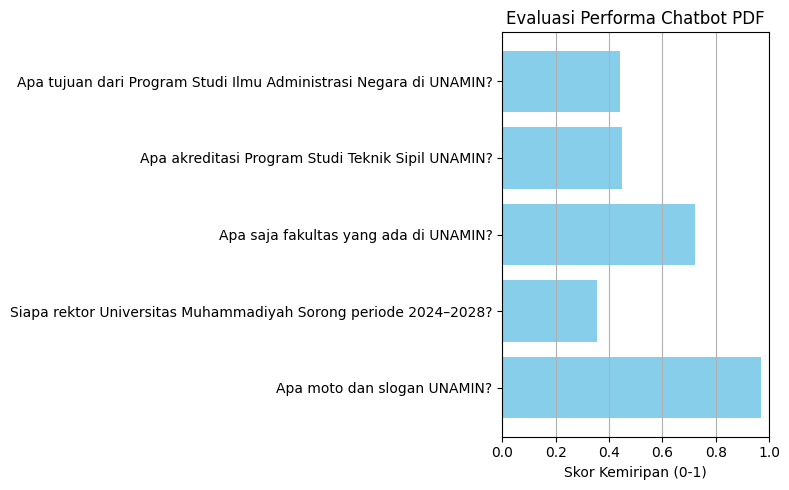

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

dataset_uji = [
    {
        "pertanyaan": "Apa moto dan slogan UNAMIN?",
        "jawaban": "Moto UNAMIN adalah 'Membangun Papua dengan Ilmu, Ketulusan, dan Karya', sedangkan slogannya adalah 'Unggul, Humanis, Mencerahkan'."
    },
    {
        "pertanyaan": "Siapa rektor Universitas Muhammadiyah Sorong periode 2024–2028?",
        "jawaban": "Rektor UNAMIN periode 2024–2028 adalah Dr. H. Muhammad Ali, MM, MH."
    },
    {
        "pertanyaan": "Apa saja fakultas yang ada di UNAMIN?",
        "jawaban": "UNAMIN memiliki 7 fakultas yaitu: Ilmu Sosial dan Ilmu Politik, Hukum, Teknik, Pertanian, Perikanan, Keguruan dan Ilmu Pendidikan, serta Ekonomi."
    },
    {
        "pertanyaan": "Apa akreditasi Program Studi Teknik Sipil UNAMIN?",
        "jawaban": "Program Studi Teknik Sipil UNAMIN telah meraih akreditasi Baik Sekali dari LAM Teknik."
    },
    {
        "pertanyaan": "Apa tujuan dari Program Studi Ilmu Administrasi Negara di UNAMIN?",
        "jawaban": "Program Studi Ilmu Administrasi Negara membekali mahasiswa dengan pemahaman mengenai tata kelola pemerintahan, kebijakan publik, manajemen sektor publik, serta etika pelayanan publik."
    }
]


# Inisialisasi model embedding semantik
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Hitung skor cosine similarity
skor_kemiripan = []
label_pertanyaan = []

for data in dataset_uji:
    prediksi = tanya_bot(data["pertanyaan"], history=None)

    emb_jawaban = model.encode([data["jawaban"]])[0]
    emb_prediksi = model.encode([prediksi])[0]

    score = cosine_similarity([emb_jawaban], [emb_prediksi])[0][0]
    skor_kemiripan.append(score)
    label_pertanyaan.append(data["pertanyaan"])

# Plot horizontal bar
plt.figure(figsize=(8, 5))
plt.barh(label_pertanyaan, skor_kemiripan, color='skyblue')
plt.xlabel("Skor Kemiripan (0-1)")
plt.title("Evaluasi Performa Chatbot PDF")
plt.xlim(0, 1)
plt.grid(axis="x")
plt.tight_layout()
plt.show()


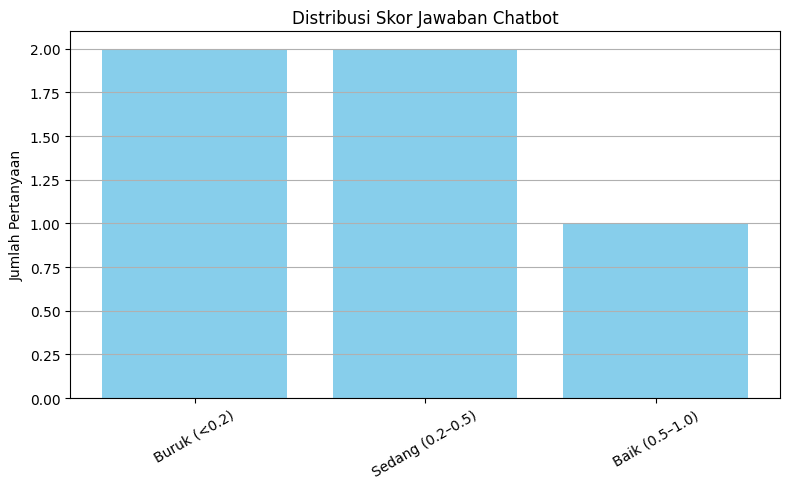

In [ ]:
import matplotlib.pyplot as plt

# Contoh skor hasil dari perhitungan cosine similarity
# (silakan ganti dengan skor_kemiripan aktual kamu)
skor_kemiripan = [0.12, 0.33, 0.45, 0.18, 0.62]

# Kategorisasi skor
kategori = []
for skor in skor_kemiripan:
    if skor < 0.2:
        kategori.append("Buruk (<0.2)")
    elif skor < 0.5:
        kategori.append("Sedang (0.2–0.5)")
    else:
        kategori.append("Baik (0.5–1.0)")

# Hitung jumlah tiap kategori
kategori_unik = ["Buruk (<0.2)", "Sedang (0.2–0.5)", "Baik (0.5–1.0)"]
jumlah_per_kategori = [kategori.count(k) for k in kategori_unik]

# Plot grafik
plt.figure(figsize=(8, 5))
plt.bar(kategori_unik, jumlah_per_kategori, color='skyblue')
plt.ylabel("Jumlah Pertanyaan")
plt.title("Distribusi Skor Jawaban Chatbot")
plt.xticks(rotation=30)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


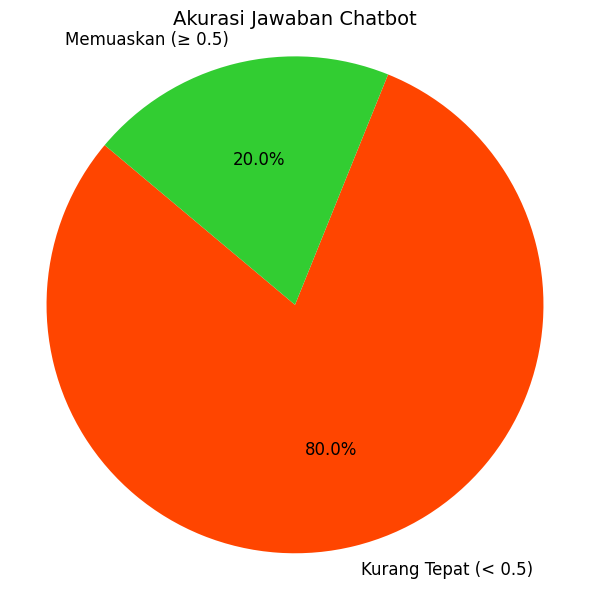

In [ ]:
import matplotlib.pyplot as plt

# Contoh skor kemiripan dari chatbot (bisa ganti dengan hasil nyatamu)
skor_kemiripan = [0.12, 0.33, 0.45, 0.18, 0.62]

# Hitung jumlah memuaskan dan kurang tepat
memuaskan = sum(1 for skor in skor_kemiripan if skor >= 0.5)
kurang_tepat = len(skor_kemiripan) - memuaskan

# Data pie
labels = ['Kurang Tepat (< 0.5)', 'Memuaskan (≥ 0.5)']
jumlah = [kurang_tepat, memuaskan]
warna = ['orangered', 'limegreen']

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(jumlah, labels=labels, colors=warna, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("Akurasi Jawaban Chatbot", fontsize=14)
plt.axis('equal')  # Lingkaran sempurna
plt.tight_layout()
plt.show()
